# PROGETTO Cross-selling di Polizze Assicurative - Eugenio Pasqua


## Descrizione

Il cliente è una compagnia di assicurazioni che ha fornito un'assicurazione sanitaria ai suoi clienti.
Implementare un modello predittivo in grado di prevedere se gli assicurati dell'anno passato potrebbero essere interessati ad acquistare anche un'assicurazione per il proprio veicolo.

Il dataset è composto dalle seguenti proprietà:

    id: id univoco dell'acquirente.
    Gender: sesso dell'acquirente.
    Age: età dell'acquirente.
    Driving_License: 1 se l'utente ha la patente di guida, 0 altrimenti.
    Region_Code: codice univoco della regione dell'acquirente.
    Previously_Insured: 1 se l'utente ha già un veicolo assicurato, 0 altrimenti.
    Vehicle_Age: età del veicolo
    Vehicle_Damage: 1 se l'utente ha danneggiato il veicolo in passato, 0 altrimenti.
    Annual_Premium: la cifra che l'utente deve pagare come premio durante l'anno.
    Policy_Sales_Channel: codice anonimizzato del canale utilizzato per la proposta (es. per email, per telefono, di persona, ecc...)
    Vintage: numero di giorni dalla quale l'utente è cliente dell'azienda.
    Response: 1 se l'acquirente ha risposto positivamente alla proposta di vendita, 0 altrimenti.


L'obiettivo del modello è prevedere il valore di Response.



## Importazione del Dataset ed elaborazione di preprocessing

Cominciamo a importarci il dataset per analizzarlo: 

In [126]:
import pandas as pd
import numpy as np

#Si tratta di fare una previsione al valore di response parliamo quindi di un tema di "Classificazione"

# Ci leggiamo il dataset 

df = pd.read_csv("./insurance_cross_sell.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<br>
Eseguiamo un conteggio e verifichiamo che il dataset necessiti di attività di preprocessing

In [127]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<br>
Non avendo campi vuoti, procediamo ora con l'encoding.<br>
Per i campi "Vehicle_Age", "Vehicle_Damage" e "Gender", eseguiamo l'encoding in modo da includerli come variabili nel modello di classificazione.<br><br>
Per i campi binari come "Vehicle_Damage" e "Gender", utilizziamo la tecnica del LabelEncoder.

In [128]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Vehicle_Damage"] = le.fit_transform(df["Vehicle_Damage"])
df["Gender"] = le.fit_transform(df["Gender"])
df


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,1,44617.0,124.0,74,0


<br>
Per il campo "Vehicle_Age", eseguiamo una verifica sulle modalità di valorizzazione. Se le valorizzazioni sono superiori a 2, utilizziamo la tecnica di OneHotEncoding, che genera valori binari per ogni tipologia espressa in tale campo.

In [129]:
df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

<br>
Il campo presenta 3 tipi di valorizzazioni; quindi, procederemo con la tecnica del OneHotEncoding.

In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()

transformer = ColumnTransformer(
    [
        ("ohe",OneHotEncoder(),[6])
    ]
)

sub_data = transformer.fit_transform(df)

#Eliminiamo la colonna che andremo a sostituire in Onehotencoding
df = df.drop("Vehicle_Age", axis=1)

# Gestiamo la sostituzione dei campi introdotti dall'operazione di codifica
name_columns = transformer.get_feature_names_out()
name_col_replace = [elem.replace("ohe__","") for elem in name_columns]
df_sub = pd.DataFrame(data = sub_data, columns=name_col_replace)

# Aggiungiamo il df_sub al df originale (concateniamo lungo le colonne e non lungo le righe) 
df = pd.concat([df,df_sub],axis=1)
df

 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0.0,0.0,1.0
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1.0,0.0,0.0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0.0,0.0,1.0
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0.0,1.0,0.0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,30170.0,26.0,88,0,1.0,0.0,0.0
381105,381106,1,30,1,37.0,1,0,40016.0,152.0,131,0,0.0,1.0,0.0
381106,381107,1,21,1,30.0,1,0,35118.0,160.0,161,0,0.0,1.0,0.0
381107,381108,0,68,1,14.0,0,1,44617.0,124.0,74,0,0.0,0.0,1.0


<br>
Ora che abbiamo un DataFrame completo per l'addestramento, verifichiamo come si distribuiscono i casi nella variabile target per il problema di classificazione. Controlliamo se i casi sono bilanciati o meno.

In [131]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<br>
Come possiamo vedere, i casi sono molto sbilanciati: 46.710 positivi e 334.399 negativi. I casi positivi rappresentano circa il 12,2%. Pertanto, è necessario adottare un metodo di ribilanciamento.
<br>
Per prima cosa, separiamo i dati di addestramento dalla variabile target:

In [132]:


# Separiamo ora i dati dalla variabile Target

col = [elem for elem in df.columns if elem not in ('id','Response')]
x = df[col].values
y = df["Response"].values


<br>
Considerando il forte sbilanciamento, utilizzeremo il metodo "RandomOverSampler" per ribilanciare i casi minoritari verso quelli con maggiore frequenza. Questo contribuirà a migliorare la precisione del modello che andremo a implementare.

In [133]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy="auto") # in questo caso utilizziamo l'oversampling portando il dataset a un livello equilibrato nei casi di minorità.

x_resampled, y_resampled = oversample.fit_resample(x,y)



<br><br>

## Implementazione del modello e Metriche
<br>

Adesso, utilizzando i dati ribilanciati, separiamo la componente di addestramento da quella di test, considerando il 20% dei dati come dati di test e utilizzando il restante come dati di addestramento. Per fare ciò, chiamiamo la funzione "train_test_split".

In [134]:
from sklearn.model_selection import train_test_split

# Effettuiamo ora lo split per eseguire una verifica di bontà del modello
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size=0.20, random_state=0)


<br>
Infine, implementiamo il modello di classificazione, standardizzando prima i valori dei dati di addestramento e di test.

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Effettuiamo la standardizzazione dei dati di x_train e x_test
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Implementiamo il nostro modello
lr = LogisticRegression(class_weight="balanced", random_state=0)
lr.fit(x_train,y_train)

# Otteniamo per il dataset di addestramento e di test gli output di previsione in termini di risultato e probabilità correlata
y_predict_train= lr.predict(x_train)
y_predict_proba_train = lr.predict_proba(x_train)

y_predict_test = lr.predict(x_train)
y_predict_proba_test = lr.predict_proba(x_test)



<br>
Ora che abbiamo il nostro modello, implementiamo un metodo che ci consente di valutare la bontà del modello attraverso le seguenti metriche:

1. Logloss
2. Precision_score
3. Recall_score
4. F1_score
5. Accuracy_score
6. Matrice di confusione
7. ROC.

Cominciamo con gli indici di scoring, implementando il metodo per stampare i loro valori relativi:
<br><br>

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def print_scoring(y, y_prediction, y_testing, y_prediction_prob):

    print(f"Logloss: {log_loss(y_testing,y_prediction_prob)}")
    print(f"Precision Score: {precision_score(y,y_prediction)}")
    print(f"Recall Score: {recall_score(y,y_prediction)}")
    print(f"F1_Score: {f1_score(y,y_prediction)}")
    print(f"Accuracy_Score: {accuracy_score(y,y_prediction)}")

print_scoring(y_train, y_predict_train, y_test, y_predict_proba_test)


Logloss: 0.4411452473186589
Precision Score: 0.7055448346144255
Recall Score: 0.9728165208584807
F1_Score: 0.8178997557124791
Accuracy_Score: 0.7833518366919733


<br>
Visualizziamo ora la ROC Curve

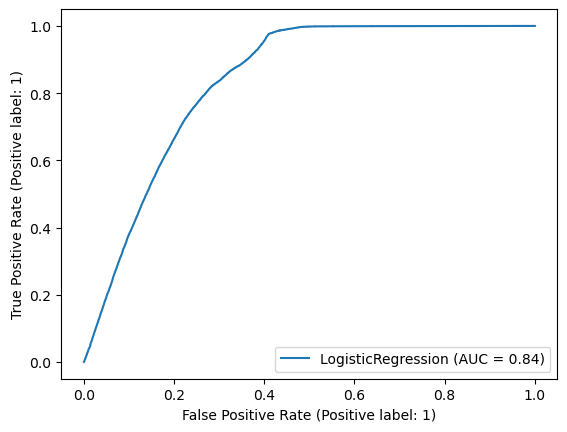

In [138]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr,x_test,y_test)

<br>
Infine proviamo a vedere il risultato della "Matrice di confusione":


<Axes: >

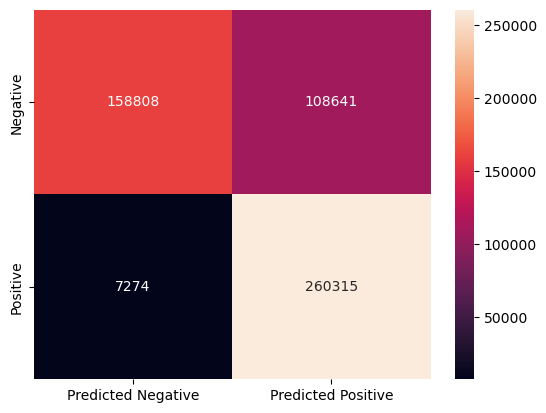

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_train, y_predict_train)
dataframe_matrix = pd.DataFrame(data = matrix, index=["Negative","Positive"],
                                columns = ["Predicted Negative", "Predicted Positive"])
sns.heatmap(dataframe_matrix, annot=True, fmt="g") # con fmt="g" non viene usata la notazione scientifica


<br>
Come possiamo vedere, rileviamo un'alta percentuale di falsi positivi (caso negativo previsto come positivo), ovvero come riportato dalla Matrice di confusione, sono circa 108.641 casi.
<br><br>
In questo caso, potremmo tentare di variare la soglia di probabilità per rimodulare la rilevazione dei falsi positivi. Rivisualizziamo l'effetto riproposto sulla bontà del modello. Quello che faremo sarà agire sulle previsioni, in modo che nel vettore delle probabilità (indice 1), probabilità di almeno 0.66 saranno settate a 1.

In [140]:
y_predict_proba_train

array([[0.99674743, 0.00325257],
       [0.37267516, 0.62732484],
       [0.99741535, 0.00258465],
       ...,
       [0.31924632, 0.68075368],
       [0.39469707, 0.60530293],
       [0.99684481, 0.00315519]])

In [144]:
# Proviamo a impostare un valore soglia di 0.66 che meglio riequilibra i falsi positivi e falsi negativi:

y_predict_train = np.where(y_predict_proba_train[:,1]>0.66,1,0)
y_predict_test = np.where(y_predict_proba_test[:,1]>0.66,1,0)

<br>
Rilanciamo la matrice di confusione per la verifica a seguito dell'intervento :

<Axes: >

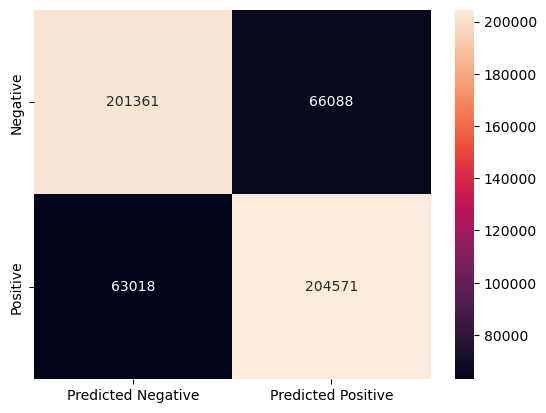

In [145]:

matrix = confusion_matrix(y_train, y_predict_train)
dataframe_matrix = pd.DataFrame(data = matrix, index=["Negative","Positive"],
                                columns = ["Predicted Negative", "Predicted Positive"])
sns.heatmap(dataframe_matrix, annot=True, fmt="g") # con fmt="g" non viene usata la notazione scientifica


<br>
Infine gli indicatori di bontà del modello:

In [146]:
print_scoring(y_train, y_predict_train, y_test, y_predict_proba_test)

Logloss: 0.4411452473186589
Precision Score: 0.7558255960452082
Recall Score: 0.7644970458426916
F1_Score: 0.7601365913110685
Accuracy_Score: 0.7586975130738377
